# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
#Use the requests library with the .get() method to query the URL's for price data
#save the response to a variable
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [6]:
#here I check that the request was successful - [200] = success
btc_data

<Response [200]>

In [7]:
#here I check that the request was successful - [200] = success
eth_data

<Response [200]>

In [8]:
#take the response and save the content to a variable
btc_content = btc_data.content
eth_content = eth_data.content

#convert the data received to json format
btc_json = btc_data.json()
eth_json = eth_data.json()

In [9]:
#here I want to get a look at the data
#I format the output of btc_json with json.dumps, and display with an indentation of 4
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19102718,
            "total_supply": 19102718,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21981.0,
                    "volume_24h": 36784898611,
                    "market_cap": 419450594323,
                    "percentage_change_1h": 0.347851050425736,
                    "percentage_change_24h": -3.45531558737747,
                    "percentage_change_7d": 5.55589263844085,
                    "percent_change_1h": 0.347851050425736,
                    "percent_change_24h": -3.45531558737747,
                    "percent_change_7d": 5.55589263844085
                }
            },
            "last_updated": 1658735334
        }
    },
    "metadata": {
        "timestamp": 1658735334,
        "num_crypt

In [10]:
#I do the same for the eth_json data
print(json.dumps(eth_json, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119821513,
            "total_supply": 119821513,
            "max_supply": 119821513,
            "quotes": {
                "USD": {
                    "price": 1526.58,
                    "volume_24h": 17723291238,
                    "market_cap": 182611025883,
                    "percentage_change_1h": 0.337904449360241,
                    "percentage_change_24h": -5.23501025716202,
                    "percentage_change_7d": 13.524048684374,
                    "percent_change_1h": 0.337904449360241,
                    "percent_change_24h": -5.23501025716202,
                    "percent_change_7d": 13.524048684374
                }
            },
            "last_updated": 1658735329
        }
    },
    "metadata": {
        "timestamp": 1658735329,
        "

In [11]:
# Fetch current BTC price
# I go down my btc_json data dictionary keys until I get the price value
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
# An interesting note is btc is #1, while ether is #1027
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

In [12]:
# Compute current value of my crpto
#for each coin I multiply the price by the amount I have
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [13]:
# Print current crypto wallet balance
# Here I keep each wallet separate. The total balance will be calculated further on
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26377.20
The current value of your 5.3 ETH is $8090.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
#I use my .env file to save my keys to variables - "ALPACA_API_KEY" and "ALPACA_SECRET_KEY"
# My .env file has been added to .gitignore file so it is not included in my repo
# this allows me to reference my secret keys while retaining privacy

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [16]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [17]:
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [18]:
# Format current date as ISO format
today = pd.Timestamp("2022-07-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [19]:
# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open   high      low   close   volume   
timestamp                                                            
2022-07-22 04:00:00+00:00  103.24  103.6  103.115  103.36  6987530   

                                                    SPY                  \
                          trade_count      vwap    open    high     low   
timestamp                                                                 
2022-07-22 04:00:00+00:00       19520  103.2654  398.92  400.18  392.75   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-22 04:00:00+00:00  395.09  71735015      525110  395.945317

In [20]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'].values[0]
spy_close_price = df_portfolio['SPY']['close'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.36
Current SPY closing price: $395.09


In [21]:
# Compute the current value of shares
# I take the amount of shares I hold and multiply by the price of each share
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19754.50
The current value of your 200 AGG shares is $20672.00


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value
# Create savings DataFrame
df_savings = pd.DataFrame({"amount":[crypto, shares]}, index = ["crypto","shares"])


# Display savings DataFrame
display(df_savings)

,amount
crypto,34468.074
shares,40426.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

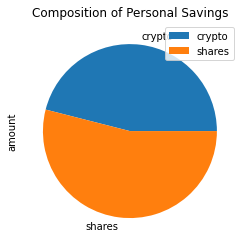

In [25]:
# Plot savings pie chart
df_savings.plot.pie(title="Composition of Personal Savings", y="amount",)

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached a financial goal! You now have enough money in your fund. Keep saving!")
elif total_savings < emergency_fund:
    remainder = emergency_fund-total_savings
    print(f"You are almost there! You need another ${remainder:0.2f} in your savings. Don't give up now!")

Congratulations! You have enough money in your fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# I use the .get_bars method on the alpaca SDK
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio_year

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.4100   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.2800   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.4200   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.4700   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.8800   
...                               ...         ...     ...     ...       ...   
2021-04-26 04:00:00+00:00       13521  114.706244  417.42  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.97  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.84  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.38  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.67  418.54  416.3400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
...                           ...        ...         ...         ...  
2021-04-26 04:00:00+00:00  417.61   52076360      295872  417.505200  
2021-04-27 04:00:00+00:00  417.52   50324187      296302  417.481280  
2021-04-28 04:00:00+00:00  417.40   50692843      330050  417.742098  
2021-04-29 04:00:00+00:00  420.06   77056617      443399  418.825111  
2021-04-30 04:00:00+00:00  417.30   84731942      478844  417.651995  

[1259 rows x 14 columns]

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# I use the weight of 60/40 for the portfolio
# I run the simulation 500 times
# for 5 years of trading days (252*5)
portfolio_thirtyyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Printing the simulation input data
portfolio_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

portfolio_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\malco\Desktop\FinTech\Assignment\Assignment - Module 05\Assignment---Module-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998981,0.990733,0.996070,0.998001,0.996145,1.000793,1.004473,0.993464,0.995582,1.007306,...,0.997286,1.002085,0.994880,1.006331,1.003058,0.999234,1.004851,1.002740,0.993614,0.996420
2,1.009010,0.994435,0.997267,0.993998,0.998461,1.002481,1.011212,0.998807,0.995167,1.007663,...,0.990649,1.007617,1.000481,1.010260,0.996483,0.992458,1.000869,1.002923,0.994320,0.991118
3,1.002343,0.997404,0.995879,0.983847,0.995348,1.005636,1.008236,1.005258,0.996490,1.009604,...,0.989013,1.007649,1.006266,1.016840,0.992934,0.997453,0.994767,1.002492,0.993922,0.986313
4,0.995144,1.006193,0.991109,0.975340,0.996606,1.006076,1.009067,1.004957,0.993565,1.004855,...,0.996205,1.005757,1.004876,1.014969,0.988979,0.994795,0.997127,1.003149,0.999717,0.984809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.201857,1.305406,1.417687,1.085021,1.486452,1.746301,1.155121,1.428696,1.532199,1.157642,...,1.295722,1.095411,1.127228,1.055035,1.127695,1.268707,0.970296,1.519132,1.990530,1.851665
1257,1.197004,1.286600,1.422417,1.081773,1.495655,1.750522,1.155861,1.428981,1.532246,1.156895,...,1.291462,1.099335,1.138386,1.060561,1.133996,1.271311,0.966296,1.511886,1.991726,1.848212
1258,1.198667,1.294277,1.428948,1.080880,1.489256,1.737806,1.152096,1.433903,1.530536,1.158750,...,1.290719,1.097164,1.139366,1.067789,1.131596,1.273150,0.968085,1.512735,1.985501,1.841902
1259,1.205342,1.290176,1.429263,1.081139,1.492922,1.738228,1.155176,1.427740,1.522937,1.157312,...,1.293545,1.097843,1.142663,1.068564,1.131834,1.283567,0.967849,1.507251,1.976305,1.830676


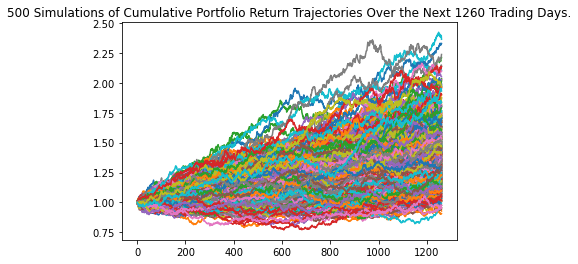

In [33]:
# Plot simulation outcomes

line_plot = portfolio_thirtyyear.plot_simulation()


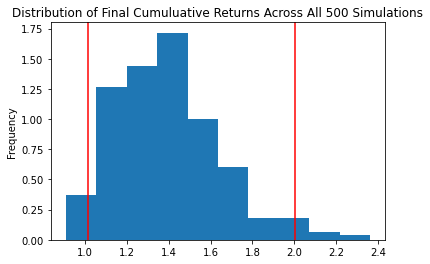

In [34]:
# Plot probability distribution and confidence intervals
# the confidence intervals are signified by the red lines
dist_plot = portfolio_thirtyyear.plot_distribution()


### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = portfolio_thirtyyear.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              1.396348
std               0.250362
min               0.906664
25%               1.207173
50%               1.381767
75%               1.534430
max               2.363321
95% CI Lower      1.013557
95% CI Upper      2.001576
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20271.15 and $40031.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
# Increased by 50% from last calculations
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30406.72 and $60047.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
portfolio_fiveyear_risk = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
portfolio_fiveyear_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\malco\Desktop\FinTech\Assignment\Assignment - Module 05\Assignment---Module-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996247,1.001788,1.001375,1.000810,1.001777,1.000691,0.998991,0.997367,0.998405,1.002427,...,1.001936,1.001272,1.003180,1.003565,0.998513,1.003352,0.997570,0.997188,0.995981,0.998095
2,0.992282,1.003736,0.999170,1.003017,0.999324,1.000316,0.999720,1.001384,0.997039,0.997920,...,0.996175,1.006042,1.001926,1.003841,0.997702,1.007521,1.002979,1.003866,0.998038,0.996872
3,0.991881,1.006960,0.998028,0.999937,1.001415,0.995880,1.001306,0.998942,0.997338,1.000313,...,1.000171,1.005659,1.007052,1.003817,0.990315,1.009771,0.999535,0.999505,1.000217,0.997877
4,0.985302,1.011231,0.989845,1.001612,1.008841,1.006753,1.002768,1.001094,0.998399,1.000985,...,0.998529,1.011447,1.010184,1.009623,0.995534,1.011688,1.000263,0.997473,1.000740,0.992963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.288866,1.212939,1.276295,1.218959,1.091006,1.191614,1.198334,1.108725,1.157070,1.165307,...,1.049782,1.199796,1.209611,1.068051,1.309222,1.069397,1.107289,1.211325,1.206462,1.169767
1257,1.288055,1.222058,1.264524,1.217652,1.092315,1.195163,1.204389,1.109929,1.158169,1.165044,...,1.055440,1.200573,1.212441,1.067668,1.308997,1.071397,1.109091,1.218085,1.204157,1.167234
1258,1.282208,1.220690,1.266764,1.225482,1.086027,1.189411,1.206911,1.115304,1.160167,1.171078,...,1.056792,1.195433,1.210758,1.063724,1.307227,1.070928,1.107653,1.218278,1.197989,1.167138
1259,1.285161,1.219576,1.263385,1.219261,1.082888,1.192027,1.216132,1.117647,1.161700,1.167511,...,1.058155,1.197251,1.209998,1.059059,1.304782,1.071738,1.109255,1.218498,1.202067,1.170450


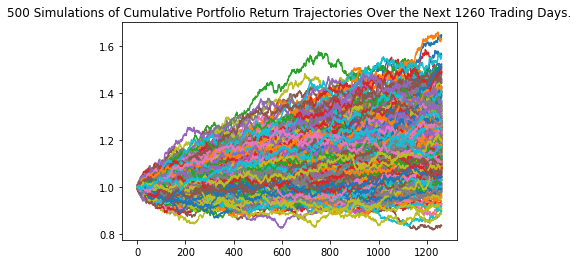

In [41]:
# Plot simulation outcomes
line_plot = portfolio_fiveyear_risk.plot_simulation()


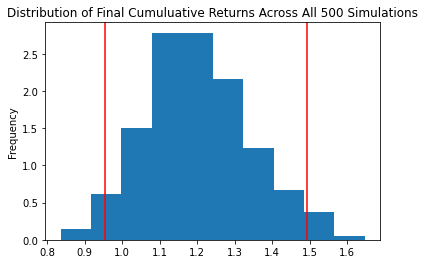

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = portfolio_fiveyear_risk.plot_distribution()


In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_risk = portfolio_fiveyear_risk.summarize_cumulative_return()


# Print summary statistics
print(tbl_risk)

count           500.000000
mean              1.199553
std               0.138720
min               0.835452
25%               1.100397
50%               1.195779
75%               1.284333
max               1.647501
95% CI Lower      0.953795
95% CI Upper      1.492684
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $60813.45 and $120094.53


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# change dthe weight of investments
portfolio_tenyear = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [.35,.65],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
portfolio_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\malco\Desktop\FinTech\Assignment\Assignment - Module 05\Assignment---Module-05\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

In [ ]:
# Plot simulation outcomes
line_plot = portfolio_tenyear.plot_simulation()


In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = portfolio_tenyear.plot_distribution()


In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = portfolio_tenyear.summarize_cumulative_return()


# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")